In [116]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
iris_df = pd.read_csv('data/iris.txt')

In [118]:
iris_df.columns = iris_df.columns.str.strip().str.lower().str.replace(' ', '_')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [119]:
iris_df = iris_df.rename(columns={'class': 'Iclass'}, index={'FIVE': 'five'})
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Iclass
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [120]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[feature_cols]
y = iris_df.Iclass

In [121]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)

In [123]:
treeclf.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [124]:
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.9904761904761905
Testing accuracy : 1.0


In [127]:
scores = cross_val_score(treeclf, Xtrain, ytrain, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

Accuracy for each fold: [0.90909091 0.90909091 0.90909091 0.81818182 0.81818182 1.
 1.         0.8        0.9        0.9       ]
Mean Accuracy: 0.8963636363636365


In [128]:
max_depth_range = range(1, 11)

In [129]:
train_scores, valid_scores = validation_curve( treeclf, Xtrain, ytrain, param_name="max_depth", param_range=max_depth_range,
    cv=10, scoring="accuracy")

In [130]:
print(train_scores.shape)

(10, 10)


In [131]:
mean_train_score = np.mean(train_scores, axis=1) 
mean_val_score   = np.mean(valid_scores, axis=1)

Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

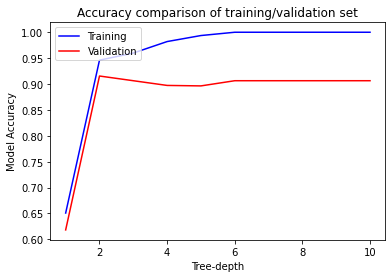

In [132]:
plt.plot(max_depth_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(max_depth_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Tree-depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

In [133]:
treeclf = DecisionTreeClassifier(max_depth=3)
treeclf.fit(Xtrain,ytrain)
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.9523809523809523
Testing accuracy : 1.0


In [134]:
# do StratifiedKFold here
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

10

In [135]:
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [136]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149] TEST: [  0   1   2   3   4  50  51  52  53  54 100 101 102 103 104]
TRAIN: [  0   1   2   3   4  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100

In [137]:
cv = StratifiedKFold(n_splits=10)
model = svm.SVC()
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

Accuracy for each fold: [1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 0.93333333 1.         1.        ]
Mean Accuracy: 0.9733333333333334


In [138]:
# do ShuffleSplit here
ss = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
ss.get_n_splits(X)

10

In [139]:
print(ss)

ShuffleSplit(n_splits=10, random_state=0, test_size=0.1, train_size=None)


In [142]:
for train_index, test_index in ss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 37  78  90  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27
 127 132  59  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69
 135  56  80 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48
  13 111  95  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128
  46  11 110 124  41 148   1 113 139  42   4 129  17  38   5  53 143 105
   0  34  28  55  75  35  23  74  31 118  57 131  65  32 138  14 122  19
  29 130  49 136  99  82  79 115 145  72  77  25  81 140 142  39  58  88
  70  87  36  21   9 103  67 117  47] TEST: [114  62  33 107   7 100  40  86  76  71 134  51  73  54  63]
TRAIN: [148   6  65  47  68  60  15 124  58 142  12  59 105  89  78  52 131 113
  98  30 136  66 133  49  62  74  17 106   8 135  80 107  90   0  36 112
   5  57 102  55  34 128  33  21  73   7  45 129 103 146 120  94  50 134
  99 126 114   9  39  97 101  29  81  20  46  51  53  23  27   2  28  37
 111  10  84 137 127  43  87  69 144 140  35  76   3  82 145 116  88  44
 147

In [144]:
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

Accuracy for each fold: [1.         0.93333333 0.86666667 0.93333333 1.         0.93333333
 1.         1.         1.         1.        ]
Mean Accuracy: 0.9666666666666668
